In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines
import scipy.io as sio
from kmeans import *

def display_data(X, width=None):

    m, n = X.shape

    if width == None:
        width = int(round(n ** .5))

    height = int(n / width)

    rows = int(np.floor(m ** .5))
    cols = int(np.ceil(m / rows))

    pad = 1

    # setup blank display


    Z = -np.ones((pad + rows * (height + pad), (pad + cols * (width + pad))))

    counter = 0

    for j in range(0, rows):
        for i in range(0, cols):
            y = j * (height + pad) + pad
            x = i * (width + pad) + pad

            max_val = np.max(abs(X[counter, :]))

            Z[y:y + height, x:x + width] = X[counter, :].reshape(height, width, order='F') / max_val
            counter += 1
            
    img = plt.imshow(Z, cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.draw()
    return img, Z


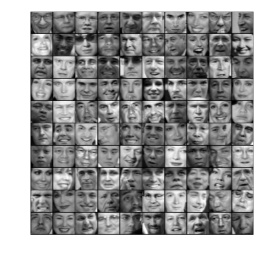

In [3]:
X = sio.loadmat('ex7faces.mat')['X']
h,_ = display_data(X[0:100, :])

(<matplotlib.image.AxesImage at 0x112f0a160>,
 array([[-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ],
        [-1.        , -0.33178124, -0.39277792, ...,  0.46172627,
          0.47025293, -1.        ],
        [-1.        , -0.34317037, -0.39832401, ...,  0.44739936,
          0.46520995, -1.        ],
        ..., 
        [-1.        ,  0.18399824,  0.12858586, ..., -0.29831089,
         -0.38552603, -1.        ],
        [-1.        ,  0.17055384,  0.13839072, ..., -0.30968494,
         -0.37619685, -1.        ],
        [-1.        , -1.        , -1.        , ..., -1.        ,
         -1.        , -1.        ]]))

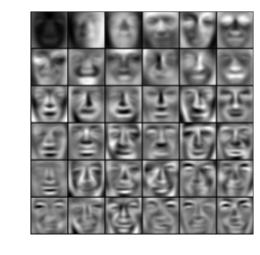

In [4]:
X_norm, mu, sigma = feature_normalize(X)
U, S = pca(X_norm)
display_data(U[:, 0:36].T)

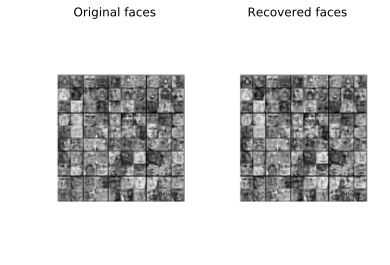

In [5]:
K = 100
Z = project_data(X_norm, U, K)
X_rec = recover_data(Z, U, K)


plt.subplot(121)
display_data(X_norm[0:100, :])
plt.title("Original faces")
plt.axis('equal')

plt.subplot(122)
display_data(X_rec[0:100, :])
plt.title('Recovered faces')
plt.axis('equal')
plt.show()


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from kmeans import *

from mpl_toolkits.mplot3d import Axes3D

A = np.double(scipy.misc.imread('bird_small.png'))
A = A / 255
img_size = A.shape

X = A.reshape((img_size[0] * img_size[1], 3), order='F')


classifier = KMeans(X, K=16)
centroids, idx = classifier.run()




K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...


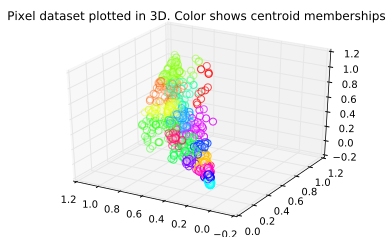

In [98]:
sel = (np.floor(np.random.rand(1000, 1) * X.shape[0]) + 1).astype(int)
sel = sel.ravel()

n = classifier.K
palette = cm.colors.hsv_to_rgb(np.c_[np.arange(n).reshape(-1, 1) / n, np.ones((n, 2))])
colors = palette[idx[sel], :]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = X[sel, 0]
ys = X[sel, 1]
zs = X[sel, 2]
points = ax.scatter(xs, ys, zs, s=50, c=[1,1,1, 0.25], edgecolors=colors)
ax.invert_xaxis()

plt.title('Pixel dataset plotted in 3D. Color shows centroid memberships');
plt.show()


array([ 0.86458533,  0.98898167,  0.65712853,  0.92590458,  0.73619648,
        0.43660928,  0.95662237,  0.26210135,  0.70951615,  0.11618319,
        0.58732464,  0.35463961,  0.97365012,  0.63683046,  0.9550526 ,
        0.18346117,  0.90262315,  0.04913027,  0.15560622,  0.49456998,
        0.2502185 ,  0.24414451,  0.88867326,  0.21486918,  0.45954313,
        0.67371585,  0.11117085,  0.40052158,  0.11047617,  0.26243037])

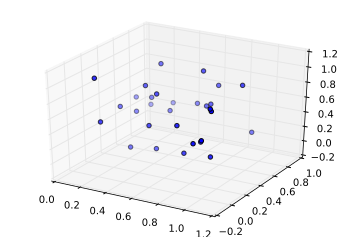

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = np.random.rand(30)
ys = np.random.rand(30)
zs = np.random.rand(30)

ax.scatter(xs, ys, zs)
xs

In [35]:
X[sel, 0].shape

(1000,)

In [17]:
X[sel, 0].ravel()

array([ 0.8745098 ,  0.90196078,  0.8745098 ,  0.8745098 ,  0.88627451,
        0.8745098 ,  0.88627451,  0.90196078,  0.8745098 ,  0.88627451,
        0.88627451,  0.90196078,  0.8745098 ,  0.8745098 ,  0.90196078,
        0.8745098 ,  0.90196078,  0.8745098 ,  0.90196078,  0.90196078,
        0.8745098 ,  0.8745098 ,  0.8745098 ,  0.8745098 ,  0.90196078,
        0.90196078,  0.88627451,  0.8745098 ,  0.88627451,  0.8745098 ,
        0.88627451,  0.90196078,  0.88627451,  0.90196078,  0.88627451,
        0.88627451,  0.90196078,  0.90196078,  0.90196078,  0.8745098 ,
        0.8745098 ,  0.90196078,  0.8745098 ,  0.90196078,  0.88627451,
        0.88627451,  0.90196078,  0.8745098 ,  0.90196078,  0.90196078,
        0.88627451,  0.8745098 ,  0.90196078,  0.8745098 ,  0.88627451,
        0.8745098 ,  0.90196078,  0.88627451,  0.88627451,  0.88627451,
        0.90196078,  0.88627451,  0.88627451,  0.90196078,  0.88627451,
        0.90196078,  0.88627451,  0.90196078,  0.88627451,  0.88

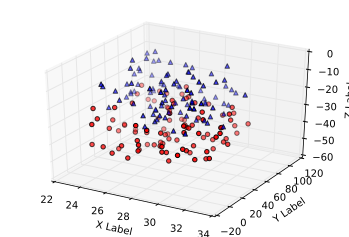

In [9]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


def randrange(n, vmin, vmax):
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 100
for c, m, zl, zh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zl, zh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [19]:
zs

array([-11.37741494, -19.12280205,  -9.62032296, -28.52760741,
        -9.39263673, -28.62234056, -25.6872192 , -23.56614408,
       -11.43505   , -26.86225829, -10.53839033,  -5.31267343,
       -26.49437239, -28.17458303, -21.68827578,  -6.62546423,
       -24.90255645, -25.04026589,  -9.7852933 , -20.54872025,
       -24.31454347, -25.71669485, -24.83086773, -12.44809809,
       -29.43136282, -25.82590726, -11.35111966, -13.78582201,
        -9.56476816, -26.73612064, -22.34088852, -11.42067227,
       -29.91196425, -18.19465319, -26.80844318,  -7.23320469,
       -24.70122984, -28.8249006 , -19.52963924,  -8.09889133,
        -8.96472366, -17.52160715, -16.29270455,  -9.02710566,
        -9.87060834, -11.35938742, -21.76809979, -20.84553093,
       -11.04548684, -24.75032721, -27.32300631, -26.43296103,
       -25.74159071, -28.94358276, -17.59674773, -10.79237054,
       -18.25199418,  -6.08158126, -24.21056322, -22.83546825,
       -20.12271873,  -5.95783083,  -6.18787318, -25.55